# NSE Stock Analysis

The following are code solutions to the questions to the assinment given.
The questions have been answered with the best of my knowledge and certain assumptions that I made while deriving a solution.

The INFY and TCS stocks and NIFTY IT index data are used.

In [1]:
from nsepy import get_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show
import numpy as np
from matplotlib.pyplot import rcParams
from statsmodels.tsa.stattools import pacf
output_notebook()

Loading BokehJS ...

<code>historyINFY</code> is the history of INFY stocks from Jan 1 2015 to Dec 31 2016.

<code>historyTCS</code> is the nse history of TCS from Jan 1 2015 to Dec 31 2016.

<code>historyNIFTYIT</code> is the history of NIFTY IT from Jan 1 2015 to Dec 31 2016.

In [2]:
historyINFY = get_history(symbol="INFY", start=date(2015,1,1), end=date(2015,12,31))

historyTCS = get_history(symbol="TCS", start=date(2015,1,1), end=date(2015,12,31))

historyNIFTYIT = get_history(symbol="NIFTY IT", start=date(2015,1,1), end=date(2015,12,31),index=True)

In [3]:
def saveFile(dataFrame,filename):
    dataFrame.to_csv(filename, sep=',', encoding='utf-8')

<code>getRollingMean</code> calculates 4, 16, 24, 52 week moving average that is later stored in csv files. Assuming that the moving average was to be calculated for weeks and not as 4*7-day moving average

In [4]:
def getRollingMean(dataFrame,periodDuration=[4, 16, 28, 40, 52],convertToWeeks=True):
    if convertToWeeks:
        dataFrame.index = pd.to_datetime(dataFrame.index)
        dataFrame = dataFrame.resample('W').mean()
        dataFrame.index.name = "Week Starting At"
    rollingMean = pd.DataFrame()
    rollingMean["Close"] = dataFrame["Close"]
    for timePeriod in periodDuration:
        rm = dataFrame["Close"].rolling(timePeriod, min_periods = 1).mean()
        rollingMean[str(timePeriod) + " week moving average"] = rm
    return rollingMean 

In [5]:
rollingMeanINFY = getRollingMean(historyINFY)
rollingMeanTCS = getRollingMean(historyTCS)
rollingMeanNIFTYIT = getRollingMean(historyNIFTYIT)

In [6]:
rollingMeanINFY.head()

,Close,4 week moving average,16 week moving average,28 week moving average,40 week moving average,52 week moving average
Week Starting At,,,,,,
2015-01-04,1993.8000,1993.800000,1993.8000,1993.8000,1993.8000,1993.8000
2015-01-11,1992.3100,1993.055000,1993.0550,1993.0550,1993.0550,1993.0550
2015-01-18,2117.2100,2034.440000,2034.4400,2034.4400,2034.4400,2034.4400
2015-01-25,2161.6200,2066.235000,2066.2350,2066.2350,2066.2350,2066.2350
2015-02-01,2142.1125,2103.313125,2081.4105,2081.4105,2081.4105,2081.4105


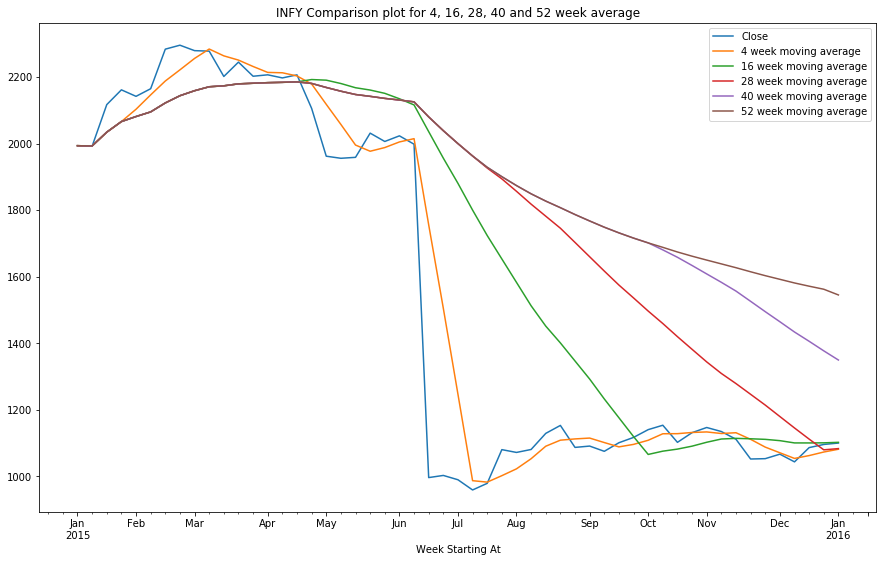

In [7]:
rollingMeanINFY.plot(figsize=(15,9),title="INFY Comparison plot for 4, 16, 28, 40 and 52 week average")

In [8]:
rollingMeanTCS.head()

,Close,4 week moving average,16 week moving average,28 week moving average,40 week moving average,52 week moving average
Week Starting At,,,,,,
2015-01-04,2562.5000,2562.500000,2562.500000,2562.500000,2562.500000,2562.500000
2015-01-11,2472.1300,2517.315000,2517.315000,2517.315000,2517.315000,2517.315000
2015-01-18,2520.1600,2518.263333,2518.263333,2518.263333,2518.263333,2518.263333
2015-01-25,2508.4800,2515.817500,2515.817500,2515.817500,2515.817500,2515.817500
2015-02-01,2517.0875,2504.464375,2516.071500,2516.071500,2516.071500,2516.071500


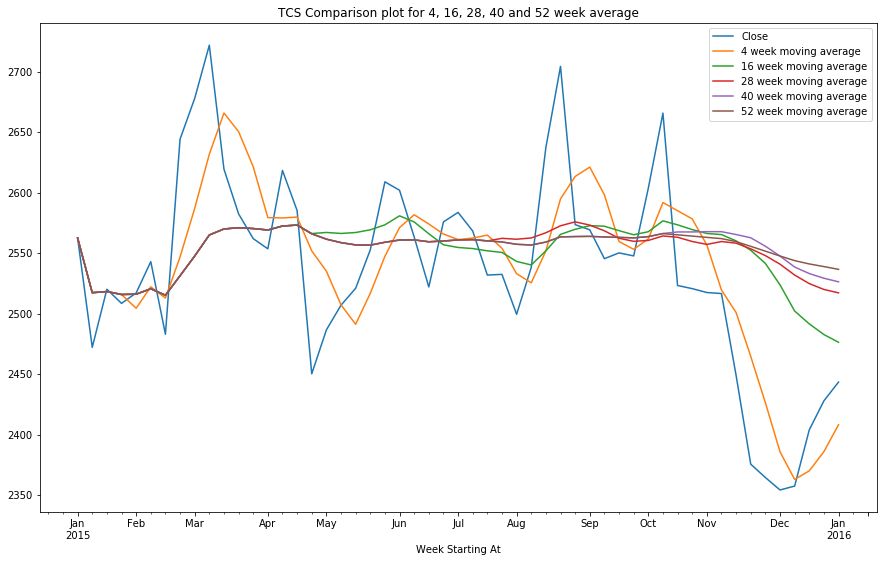

In [9]:
rollingMeanTCS.plot(figsize=(15,9),title="TCS Comparison plot for 4, 16, 28, 40 and 52 week average")

In [10]:
rollingMeanNIFTYIT.head()

,Close,4 week moving average,16 week moving average,28 week moving average,40 week moving average,52 week moving average
Week Starting At,,,,,,
2015-01-04,11293.900,11293.900000,11293.900000,11293.900000,11293.900000,11293.900000
2015-01-11,11108.450,11201.175000,11201.175000,11201.175000,11201.175000,11201.175000
2015-01-18,11598.040,11333.463333,11333.463333,11333.463333,11333.463333,11333.463333
2015-01-25,11777.490,11444.470000,11444.470000,11444.470000,11444.470000,11444.470000
2015-02-01,11787.975,11567.988750,11513.171000,11513.171000,11513.171000,11513.171000


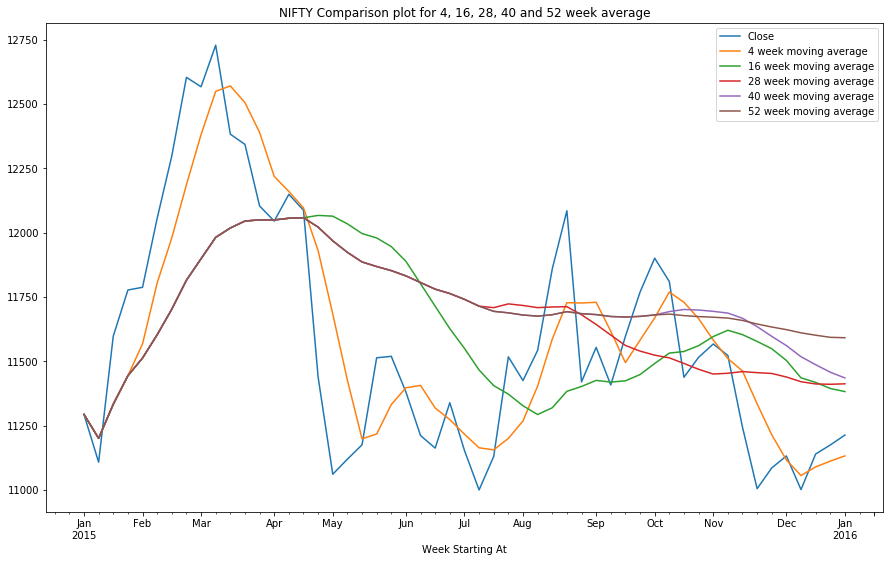

In [11]:
rollingMeanNIFTYIT.plot(figsize=(15,9),title="NIFTY Comparison plot for 4, 16, 28, 40 and 52 week average")

In [12]:
rollingMeanINFY = getRollingMean(historyINFY.asfreq('D', method='pad'), 
                                 periodDuration=[10, 75], 
                                 convertToWeeks=False)
rollingMeanTCS = getRollingMean(historyTCS.asfreq('D', method='pad'), 
                                periodDuration=[10, 75], 
                                convertToWeeks=False)
rollingMeanNIFTYIT = getRollingMean(historyNIFTYIT.asfreq('D', method='pad'), 
                                    periodDuration=[10, 75], 
                                    convertToWeeks=False)

In [13]:
rollingMeanINFY.head()

,Close,10 week moving average,75 week moving average
Date,,,
2015-01-01,1974.4,1974.400000,1974.400000
2015-01-02,2013.2,1993.800000,1993.800000
2015-01-03,2013.2,2000.266667,2000.266667
2015-01-04,2013.2,2003.500000,2003.500000
2015-01-05,1995.9,2001.980000,2001.980000


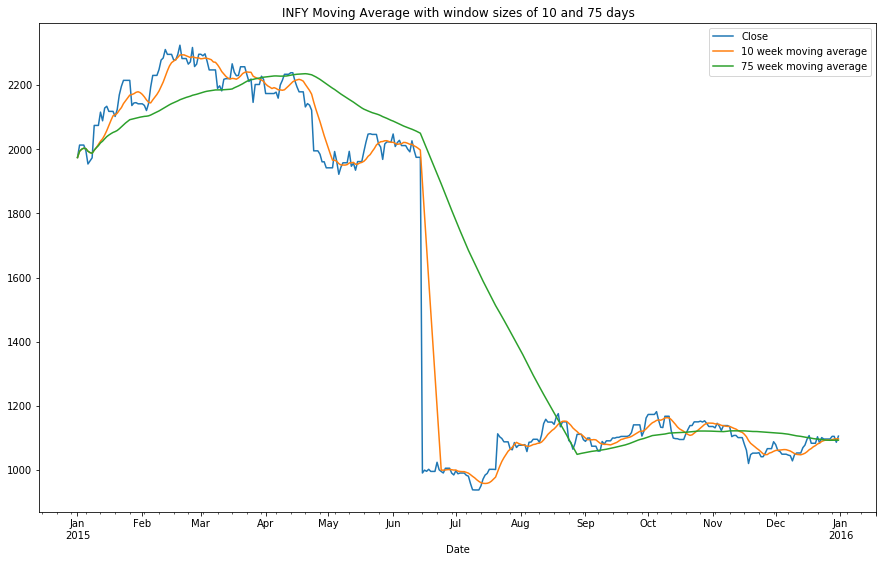

In [14]:
rollingMeanINFY.plot(figsize=(15,9), title="INFY Moving Average with window sizes of 10 and 75 days")

In [15]:
rollingMeanTCS.head()

,Close,10 week moving average,75 week moving average
Date,,,
2015-01-01,2545.55,2545.550,2545.550
2015-01-02,2579.45,2562.500,2562.500
2015-01-03,2579.45,2568.150,2568.150
2015-01-04,2579.45,2570.975,2570.975
2015-01-05,2540.25,2564.830,2564.830


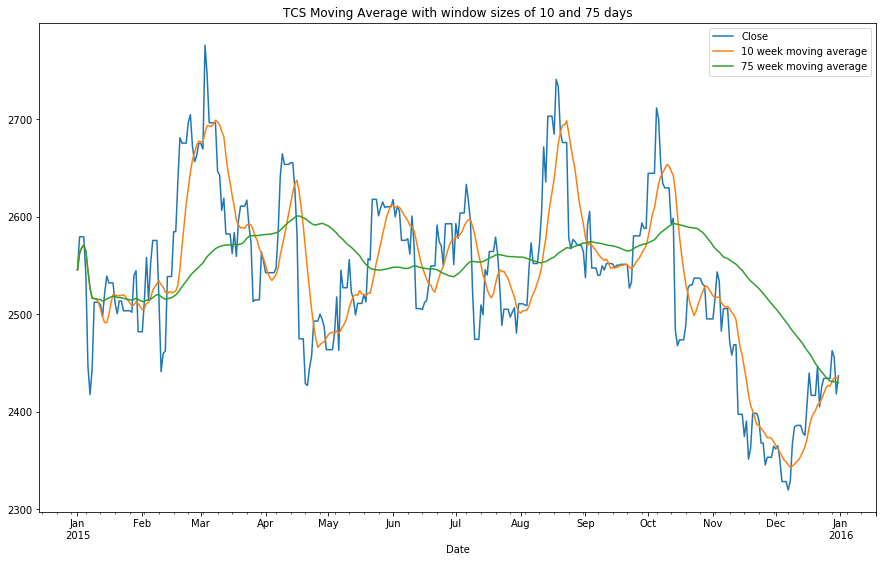

In [16]:
rollingMeanTCS.plot(figsize=(15,9), title="TCS Moving Average with window sizes of 10 and 75 days")

In [17]:
rollingMeanNIFTYIT.head()

,Close,10 week moving average,75 week moving average
Date,,,
2015-01-01,11215.70,11215.700000,11215.700000
2015-01-02,11372.10,11293.900000,11293.900000
2015-01-03,11372.10,11319.966667,11319.966667
2015-01-04,11372.10,11333.000000,11333.000000
2015-01-05,11248.55,11316.110000,11316.110000


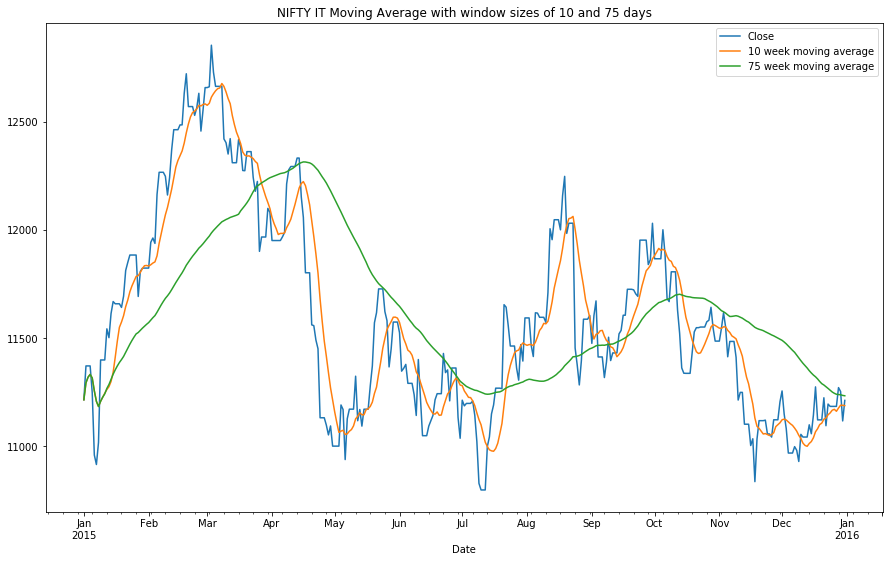

In [18]:
rollingMeanNIFTYIT.plot(figsize=(15,9), title="NIFTY IT Moving Average with window sizes of 10 and 75 days")

## Now we create new columns:
1. Volume Shock
2. Direction of Volume Shock
3. Price Shock
4. Direction of Price Shock
5. Price Shock without Volume Shock

In [19]:
def addVolumeShock(dataFrame):
    dataFrame["Prev Volume"] = dataFrame["Volume"].shift(-1)
    dataFrame["Volume Shock"] = ((abs(dataFrame["Volume"] - dataFrame["Prev Volume"]) / dataFrame["Prev Volume"]) > 0.1).astype(int)
    return dataFrame

def addVolumeShockDirection(dataFrame):
    dataFrame["Volume Shock Direction"] = 'NaN'
    def getValueForFill(row):
        if row["Volume Shock"] == 1:
            if row["Volume"] > row["Prev Volume"]:
                return 1
            else:
                return 0
        else:
            pass
    dataFrame["Volume Shock Direction"] = dataFrame.apply(getValueForFill, axis=1)
    return dataFrame

def addPriceShock(dataFrame):
    dataFrame["Prev Closing"] = dataFrame["Close"].shift(-1)
    dataFrame["Price Shock"] = (abs((dataFrame["Close"] - dataFrame["Prev Closing"]) / dataFrame["Prev Closing"]) > 0.02).astype(int)
    return dataFrame

def addPriceBlackSwan(dataFrame):
    dataFrame["Pricing Black Swan"] = dataFrame["Price Shock"]
    return dataFrame

def addPriceShockDirection(dataFrame):
    dataFrame["Price Shock Direction"] = 'NaN'
    def getValueForFill(row):
        if row["Price Shock"] == 1:
            if row["Close"] > row["Prev Closing"]:
                return 1
            else:
                return 0
        else:
            pass
    dataFrame["Price Shock Direction"] = dataFrame.apply(getValueForFill, axis=1)
    return dataFrame

def addPriceShockWoVolShock(dataFrame):
    dataFrame["Price Shock without Volume Shock"] = dataFrame["Price Shock"] & (~(dataFrame["Volume Shock"].astype(bool))).astype(int)
    return dataFrame

In [20]:
historyINFY = addVolumeShock(historyINFY)
historyINFY = addVolumeShockDirection(historyINFY)
historyINFY = addPriceShock(historyINFY)
historyINFY = addPriceShockDirection(historyINFY)
historyINFY = addPriceBlackSwan(historyINFY)
historyINFY = addPriceShockWoVolShock(historyINFY)

In [21]:
historyTCS = addVolumeShock(historyTCS)
historyTCS = addVolumeShockDirection(historyTCS)
historyTCS = addPriceShock(historyTCS)
historyTCS = addPriceShockDirection(historyTCS)
historyTCS = addPriceBlackSwan(historyTCS)
historyTCS = addPriceShockWoVolShock(historyTCS)

In [22]:
historyNIFTYIT = addVolumeShock(historyNIFTYIT)
historyNIFTYIT = addVolumeShockDirection(historyNIFTYIT)
historyNIFTYIT = addPriceShock(historyNIFTYIT)
historyNIFTYIT = addPriceShockDirection(historyNIFTYIT)
historyNIFTYIT = addPriceBlackSwan(historyNIFTYIT)
historyNIFTYIT = addPriceShockWoVolShock(historyNIFTYIT)

Uncomment and run the belove cell only if you want to save files for dataframes

In [23]:
'''
saveFile(historyINFY, "history_infy_final.csv")
saveFile(historyTCS, "history_TCS_final.csv")
saveFile(historyNIFTYIT, "history_niftyit_final.csv")
'''

'\nsaveFile(historyINFY, "history_infy_final.csv")\nsaveFile(historyTCS, "history_TCS_final.csv")\nsaveFile(historyNIFTYIT, "history_niftyit_final.csv")\n'

Else the dataframes historyINFY, historyTCS and historyNIFTYIT look as follows:

In [24]:
historyINFY.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,Prev Volume,Volume Shock,Volume Shock Direction,Prev Closing,Price Shock,Price Shock Direction,Pricing Black Swan,Price Shock without Volume Shock
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,...,258080,0.5154,1694580.0,1,0.0,2013.20,0,NaN,0,0
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,...,1249104,0.7371,2484256.0,1,0.0,1995.90,0,NaN,0,0
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,...,1830962,0.7370,2416829.0,0,NaN,1954.20,1,1.0,1,1
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,...,1772070,0.7332,1812479.0,1,1.0,1963.55,0,NaN,0,0
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,...,1317720,0.7270,3391230.0,1,0.0,1973.45,0,NaN,0,0


In [25]:
historyTCS.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,Prev Volume,Volume Shock,Volume Shock Direction,Prev Closing,Price Shock,Price Shock Direction,Pricing Black Swan,Price Shock without Volume Shock
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,...,52870,0.2883,462870.0,1,0.0,2579.45,0,NaN,0,0
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,...,309350,0.6683,877121.0,1,0.0,2540.25,0,NaN,0,0
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,...,456728,0.5207,1211892.0,1,0.0,2446.60,1,1.0,1,0
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,...,714306,0.5894,1318166.0,0,NaN,2417.70,0,NaN,0,0
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,...,886368,0.6724,782704.0,1,1.0,2443.80,0,NaN,0,0


In [26]:
historyNIFTYIT.head()

,Open,High,Low,Close,Volume,Turnover,Prev Volume,Volume Shock,Volume Shock Direction,Prev Closing,Price Shock,Price Shock Direction,Pricing Black Swan,Price Shock without Volume Shock
Date,,,,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,10004862.0,1,0.0,11372.10,0,NaN,0,0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,8858018.0,1,1.0,11248.55,0,NaN,0,0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,12515739.0,1,0.0,10959.90,1,1.0,1,0
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,10976356.0,1,1.0,10916.00,0,NaN,0,0
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,12975117.0,1,0.0,11018.15,0,NaN,0,0


## Bokeh plots of the closing price vs. dates for each stock and index :

In [27]:
def plotbokeh(dataFrame,name):
    from math import pi
    inc = (dataFrame["Volume Shock"] == 1)
    here = dataFrame["Price Shock without Volume Shock"] == 1
    w = 24 * 60 * 60 * 1000
    TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
    p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=900,title=name+" Closing Price vs date")
    p.xaxis.major_label_orientation = pi/4
    p.grid.grid_line_alpha=0.3
    p.vbar(dataFrame.index[inc], w, dataFrame.Close[inc], dataFrame.Open[inc], fill_color="#F2583E", line_color="black", legend="Volume Shock")
    p.circle(dataFrame.index[here], dataFrame.Close[here], size=7, color="olive", legend="Price Shock without Volume Shock")
    p.line(dataFrame.index, dataFrame.Close, line_color="blue")
    show(p)

The plots show closing price vs date for the stocks and index. 

In [28]:
plotbokeh(historyINFY,"INFY")

In [29]:
plotbokeh(historyTCS, "TCS")

In [30]:
plotbokeh(historyNIFTYIT, "NIFTY IT")

## Partial Autocorrelation Plots 

In [31]:
'''
def autocorrelation(series,name):
    n = series.shape[0]
    x = pd.Series(range(1, n + 1), dtype = float)
    z95, z99 = 1.959963984540054 / np.sqrt(series.shape[0]), 2.5758293035489004 / np.sqrt(series.shape[0]) 
    data = np.array(series)
    mean = np.mean(data)
    print(data.shape)
    print(mean.shape)
    c0 = np.sum((data - mean) ** 2) / float(n)
    def r(h):
        acf_lag = ((data[:n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0
        return round(acf_lag, 3)
    x = np.arange(n)
    acf_coeffs = pd.Series(map(r, x)).round(decimals = 3)
    y = acf_coeffs
    p = figure(title = name + ' ' + 'Auto-Correlation', plot_width=900, plot_height=500, x_axis_label="Lag", y_axis_label="Autocorrelation")
    p.line(x, z99, line_dash='dashed', line_color='grey')
    p.line(x, z95, line_color = 'grey')
    p.line(x, y=0.0, line_color='black')
    p.line(x, z99*-1, line_dash='dashed', line_color='grey')
    p.line(x, z95*-1, line_color = 'grey')
    p.line(x, y, line_width=2)
    return p
show(autocorrelation(historyINFY["Close"],"INFY"))
show(autocorrelation(historyTCS["Close"],"TCS"))
show(autocorrelation(historyNIFTYIT["Close"],"NITY IT"))
'''

def plotPACF(dataFrame, name):
    nlags = 40
    x_axis=np.arange(nlags)
    p = figure(title=name + " pacf plot")
    pacfForDataFrame = pacf(dataFrame["Close"], nlags=nlags)
    p.vbar(x_axis, top=pacfForDataFrame[:-1], width=.1, fill_color="red")
    p.line(x_axis,pacfForDataFrame[:-1])
    show(p)

In [32]:
plotPACF(historyINFY, "INFY")

In [33]:
plotPACF(historyTCS, "TCS")

In [34]:
plotPACF(historyNIFTYIT, "NIFTY IT")

In [35]:
'''
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

def preprocessData(dataFrame):
    X = dataFrame[["Prev Close"]]
    y = dataFrame[["Close"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

def runLinearRegression(dataFrame):
    X_train, X_test, y_train, y_test = preprocessData(dataFrame)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    return score

def runRidgeRegression(dataFrame):
    X_train, X_test, y_train, y_test = preprocessData(dataFrame)
    reg = Ridge(alpha=.00095)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    return score

scoreINFY = runLinearRegression(historyINFY)
scoreTCS = runLinearRegression(historyTCS)

print('Linear Regression score for INFY stocks', scoreINFY)
print('Linear Regression score for TCS stocks', scoreTCS)

scoreINFY = runRidgeRegression(historyINFY)
scoreTCS = runRidgeRegression(historyTCS)

print('Ridge Regression score for INFY stocks', scoreINFY)
print('Ridge Regression score for TCS stocks', scoreTCS)
'''

'\nfrom sklearn.linear_model import LinearRegression, Ridge\nfrom sklearn.svm import SVR\nfrom sklearn.model_selection import train_test_split\n\ndef preprocessData(dataFrame):\n    X = dataFrame[["Prev Close"]]\n    y = dataFrame[["Close"]]\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)\n    return X_train, X_test, y_train, y_test\n\ndef runLinearRegression(dataFrame):\n    X_train, X_test, y_train, y_test = preprocessData(dataFrame)\n    reg = LinearRegression()\n    reg.fit(X_train, y_train)\n    score = reg.score(X_test, y_test)\n    return score\n\ndef runRidgeRegression(dataFrame):\n    X_train, X_test, y_train, y_test = preprocessData(dataFrame)\n    reg = Ridge(alpha=.00095)\n    reg.fit(X_train, y_train)\n    score = reg.score(X_test, y_test)\n    return score\n\nscoreINFY = runLinearRegression(historyINFY)\nscoreTCS = runLinearRegression(historyTCS)\n\nprint(\'Linear Regression score for INFY stocks\', scoreINFY)\nprint(\'Linear Regression score